## Первичное изучение данных

In [1]:
import pandas as pd #Импорт библитеки pandas 
import numpy as np #Импорт библиотеки numpy
from scipy import stats as st

In [2]:
def df_info(data): #функция для получения первичной информации о датафрейме
    data.info()
    display(data.head())
    print(data.describe())
    
def to_time(data,column): #Функция для перевода значений в столбцах в тип datetime
    data[column] = pd.to_datetime(data[column],format='%Y-%m-%d')
    
def month(data,column): #Функция для выделения месяца из даты
    data['month'] = data[column].astype('datetime64[M]')
    
def duplic(data): #Функция для проверки дубликатов 
    print(data.duplicated().sum())

def plotting(data,y_column,title): #Функция для создания гистограммы по месяцам
    data.plot(x='month', y=y_column, kind='bar', title=title)
    data.plot(x='month', y=y_column, kind='hist')

def plot_info(data): #Функция для создания 3 гистограмм среднего количества звонков, сообщений и использованных мб
    plotting(data, 'mean_calls_min', 'Среднее количество минут звонков')
    plotting(data, 'mean_message_count', 'Среднее количество отправленных сообщений')
    plotting(data, 'mean_mb_sum', 'Среднее количество использованных Мб')
    plotting(data, 'mean_result', 'Средняя выручка с пользователей тарифа')

In [3]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [4]:
df_info(users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


           user_id        age
count   500.000000  500.00000
mean   1249.500000   46.58800
std     144.481833   16.66763
min    1000.000000   18.00000
25%    1124.750000   32.00000
50%    1249.500000   46.00000
75%    1374.250000   62.00000
max    1499.000000   75.00000


Из первичного осмотра мы можем увидеть, что пропусков в данных нет (кроме столбца `churn_date` где они могут быть), все колонки кроме `reg_date` и `churn_date` соответствуют своему типу (в этих же колонках нужно привести данные к типу datetime).

In [5]:
df_info(calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


            duration        user_id
count  202607.000000  202607.000000
mean        6.755887    1253.940619
std         5.843365     144.722751
min         0.000000    1000.000000
25%         1.300000    1126.000000
50%         6.000000    1260.000000
75%        10.700000    1379.000000
max        38.000000    1499.000000


 Из первичного анализа можно увидеть, что проблем в данных нет, только нужно заменить тип данных в столбце `call_date` на datetime и так как все звонки, даже в одну секунду, считаются за минуту, то нужно все значения в столбце `duration` округлить в большую сторону.

In [6]:
df_info(internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


          Unnamed: 0        mb_used        user_id
count  149396.000000  149396.000000  149396.000000
mean    74697.500000     370.192426    1252.099842
std     43127.054745     278.300951     144.050823
min         0.000000       0.000000    1000.000000
25%     37348.750000     138.187500    1130.000000
50%     74697.500000     348.015000    1251.000000
75%    112046.250000     559.552500    1380.000000
max    149395.000000    1724.830000    1499.000000



  
Можно заметить, что в датафрейме присутствует дополнительная колонка, которой нет в документации `Unnamed: 0` по всей видимости она выполняет роль индексов, так что от нее можно избавиться. Пропущенных значений не обнаружено. Также нужно привести значения в столбце `session_date` к типу datetime

In [7]:
df_info(messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


             user_id
count  123036.000000
mean     1256.989410
std       143.523967
min      1000.000000
25%      1134.000000
50%      1271.000000
75%      1381.000000
max      1499.000000



  
Проблем не обнаружно, нужно только привести значения столбца `message_date` к типу datetime

In [8]:
df_info(tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000           15360.000000        500.000000   
25%           287.500000           19200.000000       1125.000000   
50%           525.000000           23040.000000       1750.000000   
75%           762.500000           26880.000000       2375.000000   
max          1000.000000           30720.000000       3000.000000   

       rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute  
count         2.000000    2.000000         2.000000        2.000000  
mean       1250.000000  175.000000         2.000000        2.000000  
std         989.949494   35.355339         1.414214        1.414214  
min         550.000000  150.000000         1.000000        1.000000  
25%         900.000000  162.


Проблем в данных не обнаружено

## Предобработка данных

### Изменение типов данных

In [9]:
to_time(users,'reg_date')
to_time(calls,'call_date')
to_time(internet,'session_date')
to_time(messages,'message_date') #Приведение всех нужных столбцов к типу datetime

In [10]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


### Округление значений в данных

В задаче было написано, что оператор связи округляет звонки в большую сторону, значит нужно это сделать и с нашими значениями

In [11]:
calls['duration'] = np.ceil(calls['duration']) #Округление в большую сторону всех звонков
calls['duration'] = calls['duration'].astype(int)
display(calls.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


### Проверка данных на дубликаты

In [12]:
duplic(users)
duplic(calls)
duplic(internet)
duplic(messages)

0
0
0
0


Дубликатов в данных не обнаружено

### Удаление столбцов

Во время первичного анализа было замечено, что в таблице internet есть столбцец `Unnamed: 0`, полностью повторяющий индексы, который можно удалить 

In [13]:
internet=internet.drop(columns='Unnamed: 0')
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


## Подсчет данных о пользователях

Для получения данных по месяцам о каждом пользователе можно выделить из столбцов с датой месяц и за тем исходя из уникального id пользователя и месяца сделать сводную таблицу и полученные сводные таблицы объединить в одну, для удобства

In [14]:
month(calls,'call_date')
month(internet,'session_date')
month(messages,'message_date') #Извлечение значения месяца из колонок с датой в отдельную колонку
display(calls.head())
display(internet.head())
messages.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,2018-07-01
1,1000_1,2018-08-17,0,1000,2018-08-01
2,1000_2,2018-06-11,3,1000,2018-06-01
3,1000_3,2018-09-21,14,1000,2018-09-01
4,1000_4,2018-12-15,6,1000,2018-12-01


,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,2018-11-01
1,1000_1,1052.81,2018-09-07,1000,2018-09-01
2,1000_2,1197.26,2018-06-25,1000,2018-06-01
3,1000_3,550.27,2018-08-22,1000,2018-08-01
4,1000_4,302.56,2018-09-24,1000,2018-09-01


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,2018-06-01
1,1000_1,2018-10-08,1000,2018-10-01
2,1000_2,2018-08-04,1000,2018-08-01
3,1000_3,2018-06-16,1000,2018-06-01
4,1000_4,2018-12-05,1000,2018-12-01


In [15]:
calls_pivot = calls.pivot_table(index=['user_id','month'],values=['duration'],aggfunc=['count','sum']) #Создаем сводную таблицу и подсчитываем количество сделанных звонков и потраченных минут
calls_pivot.columns = ['calls_count','calls_min'] #Переименуем столбцы для удобства
calls_pivot.head()

calls_count  calls_min
user_id month                             
1000    2018-05-01           22        159
        2018-06-01           43        172
        2018-07-01           47        340
        2018-08-01           52        408
        2018-09-01           58        466

In [16]:
messages_pivot = messages.pivot_table(index=['user_id','month'],values=['message_date'],aggfunc=['count']) #Создаем сводную таблицу и подсчитываем количество отправленных сообщений
messages_pivot.columns = ['message_count'] #Переименуем столбцы для удобства
messages_pivot.head()

message_count
user_id month                    
1000    2018-05-01             22
        2018-06-01             60
        2018-07-01             75
        2018-08-01             81
        2018-09-01             57

In [17]:
internet_pivot = internet.pivot_table(index=['user_id','month'],values=['mb_used'],aggfunc=['sum']) #Создаем сводную таблицу и подсчитываем количество потраченных мб
internet_pivot.columns = ['mb_sum'] #Переименуем столбцы для удобства
internet_pivot.head()

mb_sum
user_id month               
1000    2018-05-01   2253.49
        2018-06-01  23233.77
        2018-07-01  14003.64
        2018-08-01  14055.93
        2018-09-01  14568.91

In [18]:
internet_pivot['mb_sum'] = np.ceil(internet_pivot['mb_sum']) #Округление в большую сторону суммы использованных мб
display(internet_pivot.head())

mb_sum
user_id month              
1000    2018-05-01   2254.0
        2018-06-01  23234.0
        2018-07-01  14004.0
        2018-08-01  14056.0
        2018-09-01  14569.0

In [19]:
users_dropped = users.drop(columns=['age','churn_date','first_name','last_name','reg_date'])
users_dropped.head()

,user_id,city,tariff
0,1000,Краснодар,ultra
1,1001,Москва,smart
2,1002,Стерлитамак,smart
3,1003,Москва,ultra
4,1004,Новокузнецк,ultra


In [20]:
common_df = calls_pivot.join([messages_pivot,internet_pivot],how='outer').reset_index('month') #Нужно убрать индекс с month для объединения с users_dropped
common_df

,month,calls_count,calls_min,message_count,mb_sum
user_id,,,,,
1000,2018-05-01,22.0,159.0,22.0,2254.0
1000,2018-06-01,43.0,172.0,60.0,23234.0
1000,2018-07-01,47.0,340.0,75.0,14004.0
1000,2018-08-01,52.0,408.0,81.0,14056.0
1000,2018-09-01,58.0,466.0,57.0,14569.0
...,...,...,...,...,...
1498,2018-10-01,41.0,247.0,42.0,20580.0
1499,2018-09-01,9.0,70.0,11.0,1846.0
1499,2018-10-01,68.0,449.0,48.0,17789.0


In [21]:
common_df = users_dropped.join(common_df,on='user_id')
common_df

,user_id,city,tariff,month,calls_count,calls_min,message_count,mb_sum
0,1000,Краснодар,ultra,2018-05-01,22.0,159.0,22.0,2254.0
0,1000,Краснодар,ultra,2018-06-01,43.0,172.0,60.0,23234.0
0,1000,Краснодар,ultra,2018-07-01,47.0,340.0,75.0,14004.0
0,1000,Краснодар,ultra,2018-08-01,52.0,408.0,81.0,14056.0
0,1000,Краснодар,ultra,2018-09-01,58.0,466.0,57.0,14569.0
...,...,...,...,...,...,...,...,...
498,1498,Владикавказ,smart,2018-10-01,41.0,247.0,42.0,20580.0
499,1499,Пермь,smart,2018-09-01,9.0,70.0,11.0,1846.0
499,1499,Пермь,smart,2018-10-01,68.0,449.0,48.0,17789.0
499,1499,Пермь,smart,2018-11-01,74.0,612.0,59.0,17964.0


Была создана общая таблица с данными о пользователях и их звонках, сообщениях и пользованием интернетом каждый месяц

In [22]:
common_df.isna().sum() #проверка на количество пропущенных значений

user_id            0
city               0
tariff             0
month              2
calls_count       42
calls_min         42
message_count    499
mb_sum            13
dtype: int64

В таблице стали присутствовать пропуски и если в столбцах `message_count`, `mb_sum`, `calls_min` и `calls_count` мы можем заменить их на 0, так как пользователь мог просто что то из этого не использовать в этом месяце, то пропуски в столбце `month` мы заменить не можем, их придется удалить

In [23]:
common_df = common_df.dropna(subset=['month']) #Удаление строк, где значение в строке month пропущено
common_df = common_df.fillna(0) # Добавление во все остальные пропущенные значения значение 0
common_df.isna().sum()

user_id          0
city             0
tariff           0
month            0
calls_count      0
calls_min        0
message_count    0
mb_sum           0
dtype: int64

## Подсчет данных для каждого пользователя

Так как для дальнейшего анализа нам понадобится разделение данных на пользователей с тарифом ultra и smart, то можно разделить их сейчас и подсчитать значения их выручки отдельно

In [24]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [25]:
smart_df = common_df.query('tariff=="smart"').copy() #Создание таблицы только с тарифом smart
smart_df['min_used'] = smart_df['calls_min'] - 500 #Подсчет количества дополнительно использованных минут 
smart_df.loc[smart_df['min_used']<=0,'min_used'] = 0 #Замена всех минут, которые не были использованы на 0
smart_df['message_used'] = smart_df['message_count'] - 50 #Подсчет количества дополлнительно использованных минут
smart_df.loc[smart_df['message_used']<=0, 'message_used'] = 0 #Замена всех минут, которые не были использованы на 0
smart_df['mb_used'] = smart_df['mb_sum'] - 15360 #Подсчет количества дполнительно использованного интернет трафика
smart_df.loc[smart_df['mb_used']<=0, 'mb_used'] = 0 #Замена всех неиспользованных мб на 0
smart_df['mb_used'] = np.ceil(smart_df['mb_used']/1024) #Перевод из мб в гб с округлением в большую сторону 
smart_df['result'] = (smart_df['min_used']*3) + \
                     (smart_df['message_used']*3) + \
                     (smart_df['mb_used']*200) + \
                     550 #Подсчет общей суммы уплаченой клиентом
smart_df

,user_id,city,tariff,month,calls_count,calls_min,message_count,mb_sum,min_used,message_used,mb_used,result
1,1001,Москва,smart,2018-11-01,59.0,430.0,0.0,18430.0,0.0,0.0,3.0,1150.0
1,1001,Москва,smart,2018-12-01,63.0,414.0,0.0,14037.0,0.0,0.0,0.0,550.0
2,1002,Стерлитамак,smart,2018-06-01,15.0,117.0,4.0,10857.0,0.0,0.0,0.0,550.0
2,1002,Стерлитамак,smart,2018-07-01,26.0,214.0,11.0,17581.0,0.0,0.0,3.0,1150.0
2,1002,Стерлитамак,smart,2018-08-01,42.0,289.0,13.0,20320.0,0.0,0.0,5.0,1550.0
...,...,...,...,...,...,...,...,...,...,...,...,...
498,1498,Владикавказ,smart,2018-10-01,41.0,247.0,42.0,20580.0,0.0,0.0,6.0,1750.0
499,1499,Пермь,smart,2018-09-01,9.0,70.0,11.0,1846.0,0.0,0.0,0.0,550.0
499,1499,Пермь,smart,2018-10-01,68.0,449.0,48.0,17789.0,0.0,0.0,3.0,1150.0
499,1499,Пермь,smart,2018-11-01,74.0,612.0,59.0,17964.0,112.0,9.0,3.0,1513.0


In [26]:
ultra_df = common_df.query('tariff=="ultra"').copy()
ultra_df['min_used'] = ultra_df['calls_min'] - 3000 #Подсчет количества дополнительно использованных минут 
ultra_df.loc[ultra_df['min_used']<=0,'min_used'] = 0 #Замена всех минут, которые не были использованы на 0
ultra_df['message_used'] = ultra_df['message_count'] - 1000 #Подсчет количества дополлнительно использованных минут
ultra_df.loc[ultra_df['message_used']<=0, 'message_used'] = 0 #Замена всех минут, которые не были использованы на 0
ultra_df['mb_used'] = ultra_df['mb_sum'] - 30720 #Подсчет количества дполнительно использованного интернет трафика
ultra_df.loc[ultra_df['mb_used']<=0, 'mb_used'] = 0 #Замена всех неиспользованных мб на 0
ultra_df['mb_used'] = np.ceil(ultra_df['mb_used']/1024) #Перевод из мб в гб с округлением в большую сторону 
ultra_df['result'] = (ultra_df['min_used']*1) + \
                 (ultra_df['message_used']*1) + \
                 (ultra_df['mb_used']*150) + \
                 1950 #Подсчет общей суммы уплаченой клиентом
display(ultra_df)

,user_id,city,tariff,month,calls_count,calls_min,message_count,mb_sum,min_used,message_used,mb_used,result
0,1000,Краснодар,ultra,2018-05-01,22.0,159.0,22.0,2254.0,0.0,0.0,0.0,1950.0
0,1000,Краснодар,ultra,2018-06-01,43.0,172.0,60.0,23234.0,0.0,0.0,0.0,1950.0
0,1000,Краснодар,ultra,2018-07-01,47.0,340.0,75.0,14004.0,0.0,0.0,0.0,1950.0
0,1000,Краснодар,ultra,2018-08-01,52.0,408.0,81.0,14056.0,0.0,0.0,0.0,1950.0
0,1000,Краснодар,ultra,2018-09-01,58.0,466.0,57.0,14569.0,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,Иркутск,ultra,2018-08-01,17.0,92.0,13.0,2615.0,0.0,0.0,0.0,1950.0
495,1495,Иркутск,ultra,2018-09-01,112.0,813.0,82.0,33068.0,0.0,0.0,3.0,2400.0
495,1495,Иркутск,ultra,2018-10-01,152.0,1030.0,82.0,29364.0,0.0,0.0,0.0,1950.0
495,1495,Иркутск,ultra,2018-11-01,129.0,954.0,79.0,38940.0,0.0,0.0,9.0,3300.0


Были подсчитаны итоговые расходы для каждого типа пользователей

In [27]:
common_df= smart_df.merge(ultra_df,how='outer') #Объединили 2 таблицы для проверки второй гипотезы

## Анализ данных

In [28]:
smart_pivot = smart_df.pivot_table(index=['tariff','month'],values=['calls_min','message_count','mb_sum','result'],aggfunc=['mean',np.var,np.std])#Создание свобдных таблиц на основе тарифа и месяцев с подсчетом среднего, дисперсии и стандартного отклонения
ultra_pivot = ultra_df.pivot_table(index=['tariff','month'],values=['calls_min','message_count','mb_sum','result'],aggfunc=['mean',np.var,np.std])
smart_pivot.columns = ['mean_calls_min','mean_mb_sum','mean_message_count','mean_result','var_calls_min','var_mb_sum','var_message_count','var_result','std_calls_min','std_mb_sum','std_message_count','std_result'] #Переименование столбцов
ultra_pivot.columns = ['mean_calls_min','mean_mb_sum','mean_message_count','mean_result','var_calls_min','var_mb_sum','var_message_count','var_result','std_calls_min','std_mb_sum','std_message_count','std_result']
smart_pivot = smart_pivot.reset_index('month') #Снятие индекса с month для более удобного построения графиков 
ultra_pivot = ultra_pivot.reset_index('month') 
display(smart_pivot)
display(ultra_pivot)

,month,mean_calls_min,mean_mb_sum,mean_message_count,mean_result,var_calls_min,var_mb_sum,var_message_count,var_result,std_calls_min,std_mb_sum,std_message_count,std_result
tariff,,,,,,,,,,,,,
smart,2018-01-01,203.852941,8514.176471,18.235294,721.323529,23787.341355,4.153401e+07,262.367201,1.925162e+05,154.231454,6444.688602,16.197753,438.766641
smart,2018-02-01,298.689655,11597.517241,24.086207,827.603448,36412.287961,3.902912e+07,473.097701,2.923587e+05,190.820041,6247.328777,21.750809,540.702011
smart,2018-03-01,390.051948,15104.649351,31.857143,1164.623377,36823.155161,3.396841e+07,718.492481,4.872390e+05,191.893604,5828.242162,26.804710,698.025091
smart,2018-04-01,367.133929,13462.651786,30.741071,963.089286,34778.207127,3.246972e+07,602.139559,3.159166e+05,186.489161,5698.221206,24.538532,562.064543
smart,2018-05-01,387.361702,15805.659574,33.773050,1197.510638,34820.061094,3.573960e+07,730.990983,5.226902e+05,186.601343,5978.260685,27.036845,722.973153
smart,2018-06-01,395.640244,15795.152439,33.402439,1204.018293,30742.918861,3.353722e+07,806.806374,5.561252e+05,175.336587,5791.133143,28.404337,745.738005
smart,2018-07-01,408.353234,15743.626866,33.751244,1223.950249,32250.269602,3.477684e+07,799.887811,5.453382e+05,179.583601,5897.188740,28.282288,738.470208
smart,2018-08-01,421.468085,16611.208511,33.638298,1320.595745,34793.583379,3.128725e+07,838.257501,6.276194e+05,186.530382,5593.500857,28.952677,792.224318
smart,2018-09-01,428.611538,16304.096154,33.638462,1249.946154,33535.342723,2.699978e+07,790.617820,5.366885e+05,183.126576,5196.131409,28.117927,732.590262


,month,mean_calls_min,mean_mb_sum,mean_message_count,mean_result,var_calls_min,var_mb_sum,var_message_count,var_result,std_calls_min,std_mb_sum,std_message_count,std_result
tariff,,,,,,,,,,,,,
ultra,2018-01-01,428.111111,13141.333333,33.777778,1950.000000,72769.361111,4.713590e+07,940.694444,0.000000,269.757968,6865.558699,30.670742,0.000000
ultra,2018-02-01,297.125000,11776.333333,21.958333,1975.000000,87919.679348,1.133121e+08,716.824275,7173.913043,296.512528,10644.816978,26.773574,84.698955
ultra,2018-03-01,489.648649,17536.081081,32.297297,2014.864865,111384.900901,1.199433e+08,1732.381381,43175.675676,333.743765,10951.862029,41.621886,207.787573
ultra,2018-04-01,458.018182,16828.618182,31.563636,2001.818182,71653.870034,9.445356e+07,1407.287542,38515.151515,267.682405,9718.722114,37.513831,196.252775
ultra,2018-05-01,510.328358,19363.671642,37.850746,2059.701493,83870.193578,1.009244e+08,1624.644052,162669.606513,289.603511,10046.112771,40.306874,403.323204
ultra,2018-06-01,479.702381,18925.416667,41.726190,2039.285714,91535.946500,8.635696e+07,1986.297619,99823.580034,302.549081,9292.844580,44.567899,315.948698
ultra,2018-07-01,545.791209,20496.153846,49.846154,2118.131868,94322.278144,1.013082e+08,2372.042735,198917.582418,307.119322,10065.198600,48.703621,446.001774
ultra,2018-08-01,510.775701,19576.570093,48.439252,2083.177570,97956.496385,1.097589e+08,2171.739199,159761.505907,312.980026,10476.586961,46.601923,399.701771
ultra,2018-09-01,539.443478,19204.773913,52.286957,2024.347826,105716.775286,8.998669e+07,2152.855530,60937.070938,325.141162,9486.131416,46.398874,246.854352


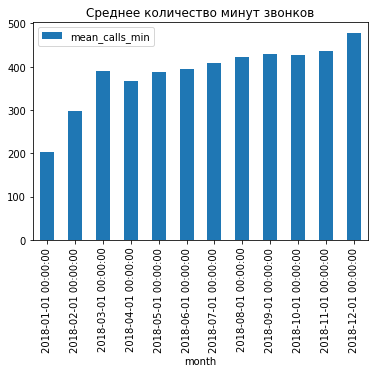

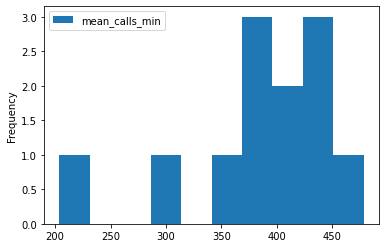

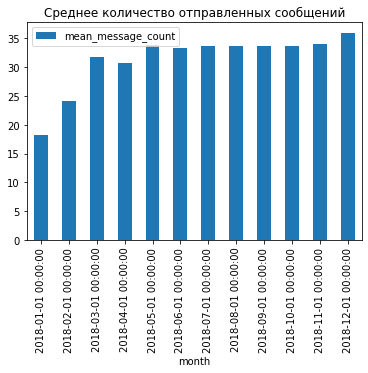

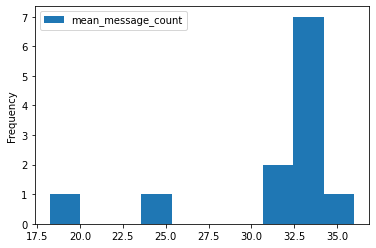

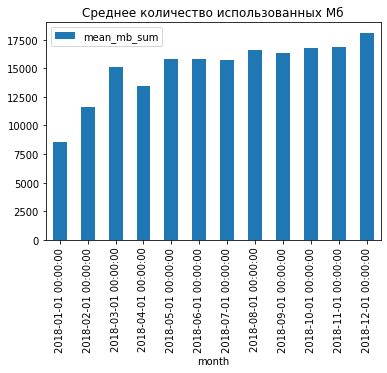

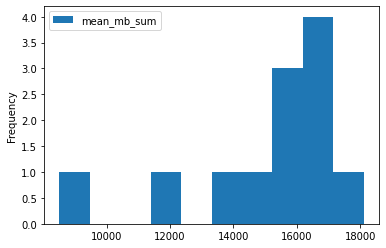

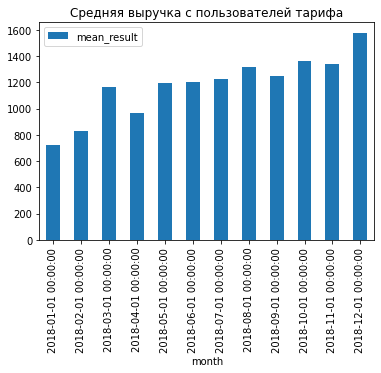

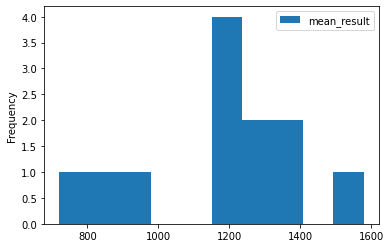

In [29]:
plot_info(smart_pivot) #Построение графиков средних значений по месяцам 

Как мы можем видеть из полученных таблиц и гистограмм в среднем пользователям тарифа "smart" нужно около 380-450 минут звонков, 33 сообщений и 17000 мб интернета. При этом можно заметить, что в первые месяцы года расход всех перечисленных услуг был ниже, чем в последующие. По гистограмме мы можем сказать, что в среднем выручка пользователей данного тарифа находится в районе 1200-1400 р в месяц

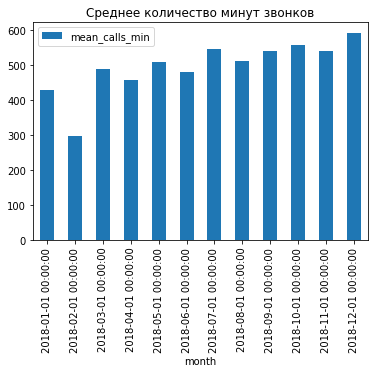

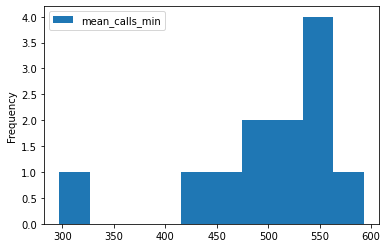

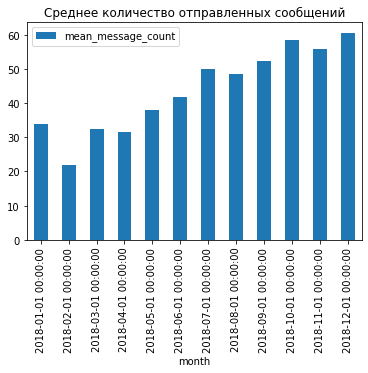

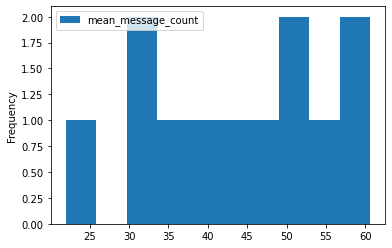

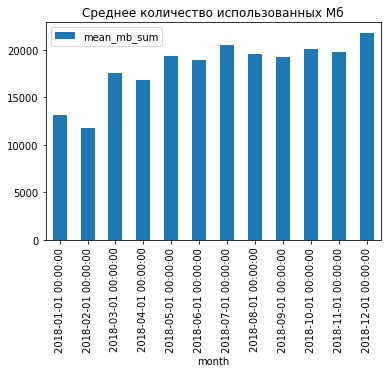

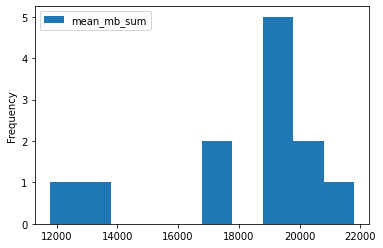

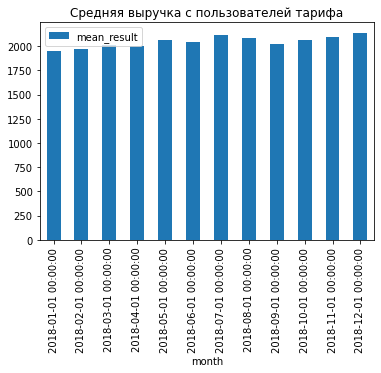

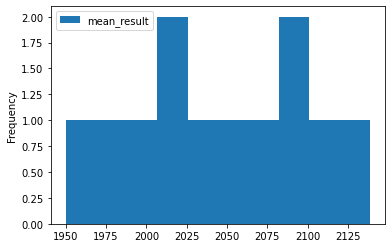

In [30]:
plot_info(ultra_pivot)

Как мы можем видеть по графикам, в среднем пользователям тарифа "ultra" нужно около 500-550 минут звонков, 30-60 сообщений и 19000 мб интернет трафика, что по всем показателям больше, чем у тарифа "smart". Также нужно заметить, что у пользователей этого тарифа в первый месяц не наблюдается настолько сильной просадки в пользовании услугами, как у тарифа "smart", при этом уменьшается в феврале и затем снова повышается, достигая пика к концу года. Средняя выручка пользователей тарифа "ultra" значительно выше, чем у тарифа "smart" и примерно в течение всего года равна 2000р

## Проверка гипотез

### Первая гипотеза

Первая гипотеза которую нужно проверить звучит так:  
- Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
  
Нулевая гипотеза исходя из этого звучит так:  
-  Средняя выручка пользователей тарифов «Ультра» и «Смарт» равна  
Альтернативная гипотеза:  
- Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Пороговое значени равно 5%

In [31]:
sample_1 = smart_df['result'] #Первая генеральная совокупность
sample_2 = ultra_df['result'] #Вторая генеральная совокупность

alpha = 0.05 #Пороговое значение 

results = st.ttest_ind(sample_1,sample_2)
results = results.pvalue

print('p-значение:',results)

if results<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Принимаем нулевую гипотезу')
    
display('Средняя выручка пользователей тарифа "smart":', sample_1.mean())
display('Средняя выручка пользователей тарифа "ultra":',sample_2.mean())   

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


'Средняя выручка пользователей тарифа "smart":'

1289.9735307312696

'Средняя выручка пользователей тарифа "ultra":'

2070.1522842639592

По значению pvalue нам приходится отвергнуть нулевую гипотезу и признать, что выручка с разных тарифов значительно различается, а исходя из средних значений, то можем увидеть, что пользователи тарифа "ultra" в среднем платят больше

### Вторая гипотеза

Вторая гипотеза которую нужно проверить звучит так:  
- Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
  
Нулевая гипотеза исходя из этого звучит так:  
-  Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов  
  
Альтернативная гипотеза:  
- Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Пороговое значени равно 5%

In [32]:
sample_1 = common_df[common_df['city']=='Москва']['result']
sample_2 = common_df[common_df['city']!='Москва']['result']

alpha=0.05

results = st.ttest_ind(sample_1,sample_2)
results = results.pvalue

print('p-значение:',results)

if results<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Принимаем нулевую гипотезу')
    
display('Средняя выручка пользователей из Москвы:', sample_1.mean())
display('Средняя выручка пользователей из других регионов:',sample_2.mean())

p-значение: 0.5440152911670224
Принимаем нулевую гипотезу


'Средняя выручка пользователей из Москвы:'

1546.7135842880523

'Средняя выручка пользователей из других регионов:'

1524.9362274298885

plevel равен 54% исходя из чего можем сделать вывод, что действительно, средняя выручка пользователей из Москвы примерно равна выручке пользователей из других регионов

## Итоговый вывод

1. В среднем пользователи тарифа "ultra" платят значительно больше, чем пользователи тарифа "smart", а значит рекламный бюджет стоит выделять, для распространения тарифа "ultra"
2. Выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, так что рекламный бюджет можно выделять в одинаковой мере на все регионы